# LOR

In [29]:
#lecture d'un fichier
using Pkg
using DelimitedFiles
using Plots
Pkg.add("Optim")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


Fetching: [========================================>]  99.9 %[====>                                    ]  8.5 %Fetching: [=====>                                   ]  10.1 %Fetching: [=====>                                   ]  10.4 %Fetching: [=====>                                   ]  10.9 %Fetching: [=====>                                   ]  11.6 %Fetching: [=====>                                   ]  12.2 %Fetching: [======>                                  ]  12.6 %Fetching: [======>                                  ]  12.9 %Fetching: [======>                                  ]  13.6 %Fetching: [======>                                  ]  14.5 %Fetching: [=======>                                 ]  15.1 %Fetching: [=======>                                 ]  16.0 %Fetching: [=======>                                 ]  16.6 %Fetching: [========>                                ]  19.4 %]  23.4 % [==========>                              ]  24.7 %Fetching: [==============>         

  Resolving package versions...
  Installed Qt_jll ─────────────────────── v5.15.2+1
  Installed Libiconv_jll ───────────────── v1.16.0+7
  Installed ArrayLayouts ───────────────── v0.3.8
  Installed Graphics ───────────────────── v1.1.0
  Installed Requires ───────────────────── v1.1.3
  Installed GeometryBasics ─────────────── v0.3.11
  Installed GPUArrays ──────────────────── v6.2.0
  Installed Optim ──────────────────────── v1.2.4
  Installed Wayland_protocols_jll ──────── v1.18.0+4
  Installed TimerOutputs ───────────────── v0.5.8
  Installed OrderedCollections ─────────── v1.4.0
  Installed NLSolversBase ──────────────── v7.7.1
  Installed Tables ─────────────────────── v1.4.0
  Installed DataDeps ───────────────────── v0.7.7
  Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
  Installed Colors ─────────────────────── v0.12.6
  Installed ZeroMQ_jll ─────────────────── v4.3.2+6
  Installed Adapt ──────────────────────── v2.4.0
  Installed Missings ───────────────────── v0.4.5
  I

   Building DataDeps → `~/.julia/packages/DataDeps/ooWXe/deps/build.log`
   Building Conda ───→ `~/.julia/packages/Conda/tJJuN/deps/build.log`
   Building GR ──────→ `~/.julia/packages/GR/RlE5Y/deps/build.log`


In [30]:
A=readdlm("data/admission.txt", ',')

100×3 Array{Float64,2}:
 34.6237  78.0247  0.0
 30.2867  43.895   0.0
 35.8474  72.9022  0.0
 60.1826  86.3086  1.0
 79.0327  75.3444  1.0
 45.0833  56.3164  0.0
 61.1067  96.5114  1.0
 75.0247  46.554   1.0
 76.0988  87.4206  1.0
 84.4328  43.5334  1.0
 95.8616  38.2253  0.0
 75.0137  30.6033  0.0
 82.3071  76.482   1.0
  ⋮                
 78.6354  96.6474  1.0
 52.348   60.7695  0.0
 94.0943  77.1591  1.0
 90.4486  87.5088  1.0
 55.4822  35.5707  0.0
 74.4927  84.8451  1.0
 89.8458  45.3583  1.0
 83.4892  48.3803  1.0
 42.2617  87.1039  1.0
 99.315   68.7754  1.0
 55.34    64.9319  1.0
 74.7759  89.5298  1.0

In [31]:
y=A[:,3];#mettre la dernière ligne dans y

In [32]:
N=length(y)

100

In [33]:
positive=(y.==1)
negative=(y.==0);


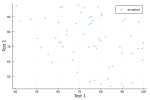

In [34]:
plot(A[positive,1],A[positive,2], st=:scatter, m=:+, label="accepted", xlabel="Test 1",ylabel="Test 2")

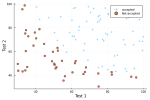

In [35]:
plot!(A[negative,1],A[negative,2], st=:scatter, m=:o, label="Not-accepted")

In [36]:
X=A[:,1:2]# recuperer les colone 1 à 2
X=[ones(N) X]# ajouter 1sur chaque ligne (N ligne) à la première colone de X

100×3 Array{Float64,2}:
 1.0  34.6237  78.0247
 1.0  30.2867  43.895
 1.0  35.8474  72.9022
 1.0  60.1826  86.3086
 1.0  79.0327  75.3444
 1.0  45.0833  56.3164
 1.0  61.1067  96.5114
 1.0  75.0247  46.554
 1.0  76.0988  87.4206
 1.0  84.4328  43.5334
 1.0  95.8616  38.2253
 1.0  75.0137  30.6033
 1.0  82.3071  76.482
 ⋮             
 1.0  78.6354  96.6474
 1.0  52.348   60.7695
 1.0  94.0943  77.1591
 1.0  90.4486  87.5088
 1.0  55.4822  35.5707
 1.0  74.4927  84.8451
 1.0  89.8458  45.3583
 1.0  83.4892  48.3803
 1.0  42.2617  87.1039
 1.0  99.315   68.7754
 1.0  55.34    64.9319
 1.0  74.7759  89.5298

In [37]:
σ(z)= 1 ./ (1+ exp.(-z))# on ajoute . avant / et exp c'es pour que sa s'aplique sur tou les element du vecteur


σ (generic function with 1 method)

In [38]:
θ_0=zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [39]:
σ(X[1,:]' *θ_0)

0.5

In [40]:
function J(X,y, θ)
    u = σ.(X*θ)
    J=y' *log.(u) + (1 .- y)'*log.(1 .- u)
    N=length(y)
    -J/N
end

J (generic function with 1 method)

In [41]:
J(X,y,zeros(3))

0.6931471805599453

In [42]:
#fonction gradiant
function gradient(X,y, θ)
    u=σ.(X*θ)
    N=length(y)
    X'*(u-y)/N    
end

gradient (generic function with 1 method)

In [43]:
gradient(X,y, zeros(3))

3-element Array{Float64,1}:
  -0.1
 -12.009216589291151
 -11.262842205513593

In [44]:
function gradientDescent(X,y,θ_0,α=0.01,T=100)
    θs=[θ_0]
    θ=θ_0
    for t=1:T
        ∇=gradient(X,y,θ)
        θ=θ- α*∇
        push!(θs,θ)
    end
    θs
end


gradientDescent (generic function with 3 methods)

In [45]:
X

100×3 Array{Float64,2}:
 1.0  34.6237  78.0247
 1.0  30.2867  43.895
 1.0  35.8474  72.9022
 1.0  60.1826  86.3086
 1.0  79.0327  75.3444
 1.0  45.0833  56.3164
 1.0  61.1067  96.5114
 1.0  75.0247  46.554
 1.0  76.0988  87.4206
 1.0  84.4328  43.5334
 1.0  95.8616  38.2253
 1.0  75.0137  30.6033
 1.0  82.3071  76.482
 ⋮             
 1.0  78.6354  96.6474
 1.0  52.348   60.7695
 1.0  94.0943  77.1591
 1.0  90.4486  87.5088
 1.0  55.4822  35.5707
 1.0  74.4927  84.8451
 1.0  89.8458  45.3583
 1.0  83.4892  48.3803
 1.0  42.2617  87.1039
 1.0  99.315   68.7754
 1.0  55.34    64.9319
 1.0  74.7759  89.5298

In [46]:
T=100

100

In [47]:
θs=gradientDescent(X,y,zeros(3),0.01,T)

101-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0]
 [0.001, 0.12009216589291151, 0.11262842205513593]
 [-0.0029999198074320294, -0.08803412364354275, -0.10584942248797885]
 [0.0029997072948797837, 0.36026434536565216, 0.33787159497914404]
 [-0.0010002927051189336, 0.15213514097198838, 0.11939002659375197]
 [-0.005000273659983579, -0.05599341204624189, -0.09909066277548367]
 [0.0009976588473495805, 0.39222165047936597, 0.3445513844981232]
 [-0.00300234115265007, 0.1840924460856728, 0.1260698161126898]
 [-0.007002336353122571, -0.024036599638763062, -0.09241153197937108]
 [-0.0010174635460030099, 0.4233939776729875, 0.3506269610205922]
 [-0.005017463546002909, 0.21526477327928645, 0.13214539263514774]
 [-0.009017462232966516, 0.007135611474798714, -0.08633611573650507]
 [-0.003159876632780882, 0.44552139831350923, 0.35082561016781966]
 ⋮
 [-0.06977117477484257, 0.11891960231232554, -0.27507092409929035]
 [-0.06409195034852984, 0.5394795334120994, 0.15611647306739013]
 [-0.0680919503

In [48]:
Js=map(t-> J(X,y,θs[t]),1:T)

100-element Array{Float64,1}:
   0.6931471805599453
   4.960600143358937
   8.645471645494409
 NaN
   5.774430398356613
   6.910500822001943
 NaN
   6.584694094674064
   5.183965587232881
 NaN
   7.3654150409260115
   3.531109494571138
 NaN
   ⋮
   5.5400462246546445
   6.960675226995366
 NaN
   5.506802493137729
   7.018263251147866
 NaN
   5.4036781302179815
   7.211088305544688
 NaN
   5.348517040047366
   7.306318057177823
 NaN

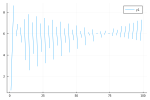

In [49]:
plot(1:T,Js)

In [50]:
θ_best=θs[T]

3-element Array{Float64,1}:
 -0.07110201783065606
  0.5474351608137535
  0.13753280397313755

In [51]:
function classify(X,θ_best)
    score=x'*θ_best
    if (score>=0)1 else 0 end
end

classify (generic function with 1 method)

In [ ]:
ŷ=map(i->classify(X[i,:],θ_best),1:N)

In [ ]:
accuracy=sum(ŷ.==)/N

In [54]:
function g!(∇,θ)
    grad=gradient(X,y,θ)
    for j=i:lenght(θ)
        ∇[j]=grad[j]        
    end
end

g! (generic function with 1 method)

In [55]:
using Optim

┌ Info: Precompiling Optim [429524aa-4258-5aef-a3af-852621145aeb]
└ @ Base loading.jl:1278
